## How to create plots using the group by statement in pandas

We're going to be looking at the figures for [visitors to London](https://data.london.gov.uk/dataset/number-international-visitors-london) collected by the International Passenger Survey (IPS).

In [2]:
#IMPORT ALLLLL THE THINGS!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
% matplotlib inline

In [3]:
#let's read in a file
df = pd.read_csv('https://files.datapress.com/london/dataset/number-international-visitors-london/2017-01-26T18:50:00/international-visitors-london-raw.csv')

In [4]:
#and look at the first few columns of the dataset
df.head()

,year,quarter,market,dur_stay,mode,purpose,area,visits,spend,nights,sample
0,2002,Q1,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
1,2002,Q1,Belgium,1-3 nights,Air,Business,LONDON,9.284226,2.399577,12.604959,19
2,2002,Q1,Belgium,1-3 nights,Air,VFR,LONDON,0.877182,0.089833,2.153128,3
3,2002,Q1,Belgium,1-3 nights,Air,Miscellaneous,LONDON,0.163874,0.010160,0.163874,1
4,2002,Q1,Belgium,1-3 nights,Sea,Business,LONDON,1.648670,0.016789,1.650300,1


In [5]:
#let's first get a feel for the dataset we're working with

def eda(dataframe):
    print "missing values \n", dataframe.isnull().sum()
    print "dataframe index \n", dataframe.index
    print "dataframe types \n", dataframe.dtypes
    print "dataframe shape \n", dataframe.shape
#     print "dataframe describe \n", dataframe.describe()
    for item in dataframe:
        print item
        print df[item].nunique()


In [6]:
eda(df)
#cool, this is a really clean dataset. No missing values, ans some interesting categories we can work with.

missing values 
year        0
quarter     0
market      0
dur_stay    0
mode        0
purpose     0
area        0
visits      0
spend       0
nights      0
sample      0
dtype: int64
dataframe index 
RangeIndex(start=0, stop=50565, step=1)
dataframe types 
year         object
quarter      object
market       object
dur_stay     object
mode         object
purpose      object
area         object
visits      float64
spend       float64
nights      float64
sample        int64
dtype: object
dataframe shape 
(50565, 11)
year
15
quarter
4
market
62
dur_stay
4
mode
3
purpose
5
area
1
visits
45622
spend
49783
nights
49615
sample
190


In [7]:
#let's first compare how much people spend based on the purpose of their visit. 
#so we'll use pandas to group by purpose and look at the mean of what folks spent in each category
df.groupby('purpose').spend.mean()

purpose
Business         3.127423
Holiday          3.449832
Miscellaneous    1.319764
Study            2.999903
VFR              1.599405
Name: spend, dtype: float64

I am surprised to see how close spending on business vs. spending on holiday are. But then again, I guess London is an incredibly expensive city, and if you're out every other night, it's going to all start adding up.

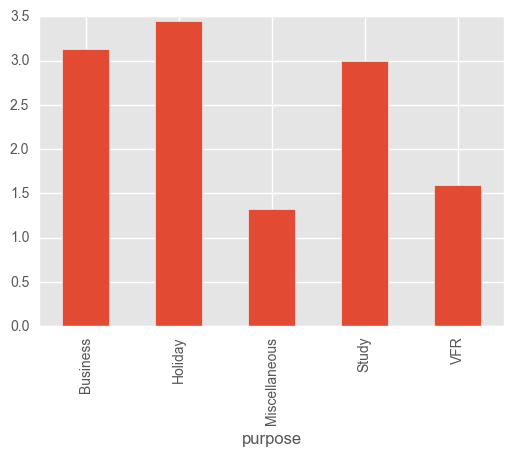

In [8]:
#Okay, now let's look at that exact same thing as a bar chart.
df.groupby('purpose').spend.mean().plot(kind='bar')

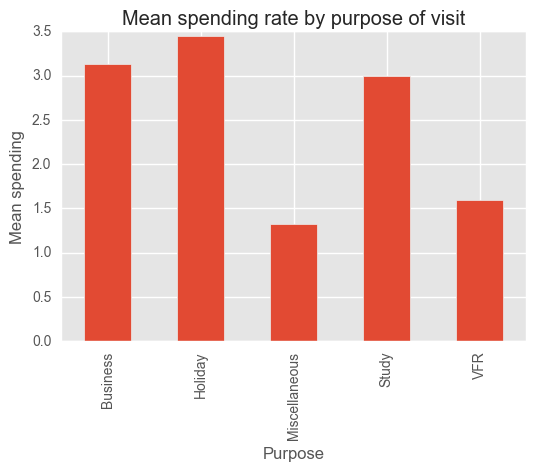

In [9]:
#so that was pretty easy. What if we wanted to add axes and the like?
df.groupby('purpose').spend.mean().plot(kind='bar')
plt.title("Mean spending rate by purpose of visit")
plt.xlabel("Purpose")
plt.ylabel("Mean spending")
#it's literally that easy

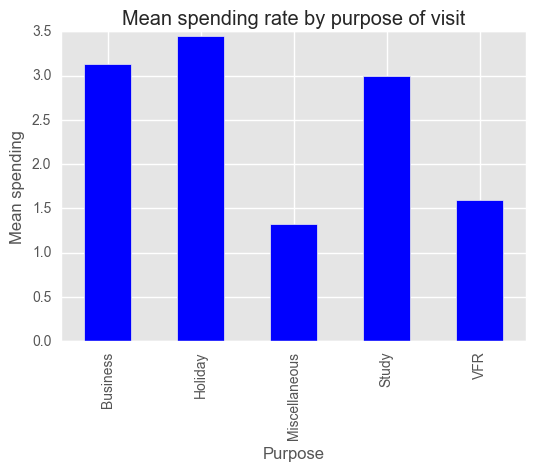

In [10]:
#what if we wanted to change colours?
df.groupby('purpose').spend.mean().plot(kind='bar', color='b')
plt.title("Mean spending rate by purpose of visit")
plt.xlabel("Purpose")
plt.ylabel("Mean spending")

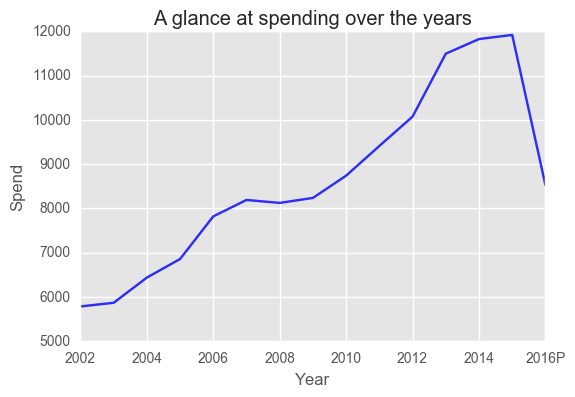

In [13]:
#What if we want to look at spends over several years?
df.groupby('year').spend.sum().plot(kind="line", color='b', alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Spend')
plt.title('A glance at spending over the years')
#looks like there was a sharp drop in 2016. It'd be really interesting to bring in additional data and see why that was the case

Mapping with group by statements in pandas is incredibly easy. The only thing to remember (that I often forget, I'll admit) is to make sure your labels look good and that your plot makes sense. 

Otherwise, happy plotting!